In [1]:
import numpy as np
import importlib
from matplotlib import pyplot as plt
import pandas as pd
import math
import os
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import sklearn
%matplotlib inline

import analyzer
import subject
import visualization
importlib.reload(analyzer)
importlib.reload(subject)
importlib.reload(visualization)

<module 'visualization' from '/Users/bang/workspace/iFEED_experiment_result_analysis_2019/visualization.py'>

Set file paths

In [2]:
rootPath = '/Users/bang/workspace/iFEED_experiment_result_analysis_2019/data'

In [3]:
surveyDataFilePath = os.path.join(rootPath, 'survey.csv')
loggedDataFilesRootPath = rootPath

Initialize the analyzer

In [4]:
resultAnalyzer = analyzer.ResultAnalyzer(surveyDataFilePath, loggedDataFilesRootPath)

In [5]:
resultAnalyzer.gradeAnswers(confidenceThreshold=10)

In [6]:
s0 = resultAnalyzer.subjects[0]
s1 = resultAnalyzer.subjects[1]
s2 = resultAnalyzer.subjects[2]
s3 = resultAnalyzer.subjects[3]
s4 = resultAnalyzer.subjects[4]
s5 = resultAnalyzer.subjects[5]
s6 = resultAnalyzer.subjects[6]


# Get DataFrame

In [7]:
resultAnalyzer.getDataFrame()

,id,condition,fcl,fpwc,dcl,dpwc,FScore,DScore,PScore,NScore,HScore,LScore,dist2UP,totalScore,selfAssessment
0,5401038285006004819-9_15_19_13,interactive,0.89,0.56,0.78,0.67,0.73,0.73,0.44,1.00,0.86,0.91,0.830796,0.73,2.50
1,3700789476005004819-9_16_15_58,automated,0.22,0.33,0.67,0.33,0.28,0.50,0.22,0.33,0.29,0.18,0.436284,0.39,1.50
2,3664515135004004819-9_20_14_13,manual,0.44,0.67,0.44,0.33,0.56,0.39,0.67,0.44,0.29,0.55,0.812639,0.47,2.50
3,3221520754006004819-10_2_6_8,interactive,0.33,0.44,0.67,0.78,0.39,0.73,0.11,0.67,0.43,0.27,0.623228,0.56,2.25
4,5577734270005004819-10_4_13_54,automated,0.44,0.56,0.67,0.22,0.50,0.45,0.44,0.56,0.57,0.36,0.509791,0.47,3.00
5,1708104476004004819-10_8_16_14,manual,0.22,0.56,0.44,0.11,0.39,0.28,0.33,0.44,0.14,0.27,0.915396,0.33,2.25
6,5772081801006004819-10_10_13_3,interactive,0.89,0.67,1.00,0.78,0.78,0.89,0.78,0.78,0.86,0.91,0.674159,0.83,3.25


# Demographic data

In [8]:
s0.demographic_data

{'age': 33,
 'gender': 2,
 'education': 7,
 'major': 'Aerospace Engineering, Industrial / Systems Engineering',
 'employerType': 'For profit'}

In [9]:
s1.demographic_data

{'age': 34,
 'gender': 1,
 'education': 7,
 'major': 'Aerospace Engineering',
 'employerType': 'Academic institution'}

In [10]:
s2.demographic_data

{'age': 31,
 'gender': 1,
 'education': 7,
 'major': 'Aerospace Engineering, Electrical Engineering',
 'employerType': 'Non-profit (non-profit research organization, government contractor, etc.)'}

In [11]:
s3.demographic_data

{'age': 34,
 'gender': 1,
 'education': 7,
 'major': 'Aerospace Engineering, Industrial / Systems Engineering, Mathematics / Statistics',
 'employerType': 'Non-profit (non-profit research organization, government contractor, etc.)'}

In [12]:
s4.demographic_data

{'age': 36,
 'gender': 1,
 'education': 7,
 'major': 'Aerospace Engineering',
 'employerType': 'Government'}

In [13]:
s5.demographic_data

{'age': 33,
 'gender': 1,
 'education': 7,
 'major': 'Other',
 'employerType': 'Academic institution'}

In [14]:
s0.printloggedDataSummary(task="learning_task")
print("\n")
s1.printloggedDataSummary(task="learning_task")
print("\n")
s2.printloggedDataSummary(task="learning_task")
print("\n")
s3.printloggedDataSummary(task="learning_task")

Subject: 5401038285006004819-9_15_19_13 - condition: 6
counter_design_viewed: 62
counter_feature_viewed: 42
counter_filter_used: 0
counter_local_search_run: 2
counter_generalization_run: 4
counter_generalization_selected: 3
features_found: 77


Subject: 3700789476005004819-9_16_15_58 - condition: 5
counter_design_viewed: 751
counter_feature_viewed: 9
counter_filter_used: 0
counter_local_search_run: 0
counter_generalization_run: 0
counter_generalization_selected: 0
features_found: 30


Subject: 3664515135004004819-9_20_14_13 - condition: 4
counter_design_viewed: 1018
counter_feature_viewed: 10
counter_filter_used: 21
counter_local_search_run: 0
counter_generalization_run: 0
counter_generalization_selected: 0
features_found: 0


Subject: 3221520754006004819-10_2_6_8 - condition: 6
counter_design_viewed: 34
counter_feature_viewed: 14
counter_filter_used: 0
counter_local_search_run: 4
counter_generalization_run: 4
counter_generalization_selected: 1
features_found: 77


In [15]:
s0.printloggedDataSummary(task="feature_synthesis_task")
print("\n")
s1.printloggedDataSummary(task="feature_synthesis_task")
print("\n")
s2.printloggedDataSummary(task="feature_synthesis_task")
print("\n")
s3.printloggedDataSummary(task="feature_synthesis_task")

Subject: 5401038285006004819-9_15_19_13 - condition: 6
counter_feature_viewed: 1
counter_filter_used: 8
features_found: 7


Subject: 3700789476005004819-9_16_15_58 - condition: 5
counter_feature_viewed: 0
counter_filter_used: 7
features_found: 6


Subject: 3664515135004004819-9_20_14_13 - condition: 4
counter_feature_viewed: 11
counter_filter_used: 9
features_found: 11


Subject: 3221520754006004819-10_2_6_8 - condition: 6
counter_feature_viewed: 4
counter_filter_used: 5
features_found: 5


In [16]:
s0.printloggedDataSummary(task="design_synthesis_task")
print("\n")
s1.printloggedDataSummary(task="design_synthesis_task")
print("\n")
s2.printloggedDataSummary(task="design_synthesis_task")
print("\n")
s3.printloggedDataSummary(task="design_synthesis_task")

Subject: 5401038285006004819-9_15_19_13 - condition: 6
counter_design_viewed: 28
counter_design_evaluated: 12
designs_evaluated: 12


Subject: 3700789476005004819-9_16_15_58 - condition: 5
counter_design_viewed: 62
counter_design_evaluated: 42
designs_evaluated: 42


Subject: 3664515135004004819-9_20_14_13 - condition: 4
counter_design_viewed: 38
counter_design_evaluated: 16
designs_evaluated: 16


Subject: 3221520754006004819-10_2_6_8 - condition: 6
counter_design_viewed: 33
counter_design_evaluated: 14
designs_evaluated: 14


# Get transcript comments

In [17]:
subjects_manual = resultAnalyzer.filterSubjects(condition=4)
subjects_auto = resultAnalyzer.filterSubjects(condition=5)

In [18]:
resultAnalyzer.getComments(resultAnalyzer.subjects, "problem_solving_task", "F_cl_5", displayParticipantID=True, displayKeyword=False)


['[3700789476005004819-9_16_15_58] Yes, correct...',
 '[3664515135004004819-9_20_14_13] I think this is true. Because dawn and dusk generate more power for the satellite.']

In [19]:
resultAnalyzer.getComments(subjects_manual, "problem_solving_task", "F", displayParticipantID=False, displayKeyword=True)


["[F_cl_1] So AERO_POL and HIRES_SOUND...So I'm not sure. So I just click one of the option and say confidence of 0.",
 '[F_cl_2] ...',
 "[F_cl_3] I think this is False... because SWIRSPEC is both visible and nocturnal (?), so it can be used both day and night. So I'll put the confidence level of 15.",
 "[F_cl_4] I'm not confident about this one... ",
 '[F_cl_5] I think this is true. Because dawn and dusk generate more power for the satellite.',
 '[F_cl_6] I think this is false. I think almost all the orbits had some satellites.',
 "[F_cl_7] I'm not sure of this...",
 "[F_cl_8] I'm not sure...",
 '[F_cl_9] I think I oberved most of the instrument - vegetation - to be in 600km, but not sure if it was INSAR or the other type of the vegetation instrument.',
 "[F_pwc_1] I'm not sure.",
 "[F_pwc_2] I think it's the first one.. but not 100% confident.",
 '[F_pwc_3] I think uh... lidars and radars should not be assigned to the same orbit. But I did not oberved it within this tutorial. So I wi

In [20]:
resultAnalyzer.getComments(subjects_auto, "problem_solving_task", "F_cl", displayParticipantID=False, displayKeyword=True)


['[F_cl_1] I think so...',
 "[F_cl_2] Honestly, I don't, in this case, I'm not referring to tradespace, and referring to what I know. ",
 '[F_cl_3] [inaudible] ...',
 '[F_cl_4] Yes that is true, I remember that.',
 '[F_cl_5] Yes, correct...',
 "[F_cl_6] This one, I don't know. I'm going to guess.",
 "[F_cl_7] No I remember that SAR_ALTIM was always on its own. But I don't remeber the orbit honestly. Well, I think it's false but not really confident.",
 "[F_cl_8] I don't know...",
 '[F_cl_9] [inaudible] I think [inaudible]']

In [21]:
resultAnalyzer.getComments(resultAnalyzer.subjects, "survey", "gpe", displayParticipantID=False, displayKeyword=True)


['[4_gpe] This one is way too many features to discuss [inaudible]',
 '[5_gpe] This is more useful, I think.',
 "[6_gpe] This one, it's about classes.",
 '[4_gpe] I think the first case is better because, it is short and it summarizes information more efficiently.',
 '[5_gpe] I think the first case filters out... uh... I think both are useful. Hmm... maybe the second case.',
 '[6_gpe] I think the first case carries more useful information.']

# Synthesis task data visualization

In [22]:
g1 = [s2, s5]
g2 = [s1, s4]
g3 = [s0, s3, s6]
# g3 = [s6]

In [23]:
visualizer = visualization.Visualizer(groups=[g1,g2,g3], groupNames=['Manual','Automated','Interactive'])

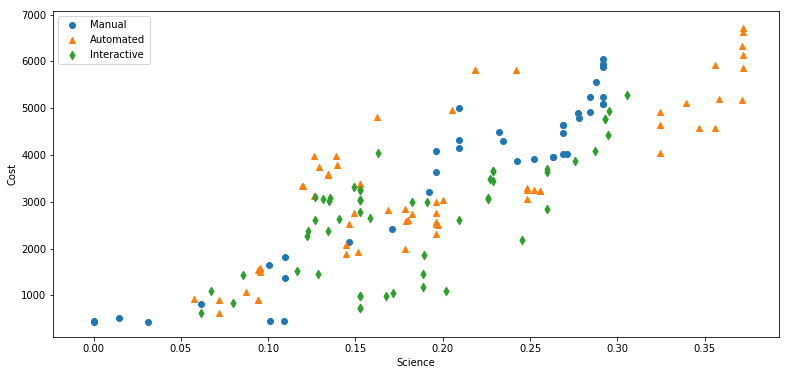

In [24]:
visualizer.designSynthesisScatter(markers=['o','^','d'])


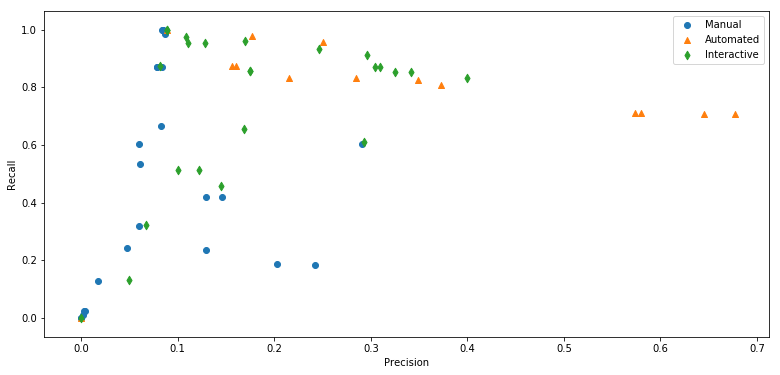

In [25]:
visualizer.featureSynthesisScatter(markers=['o','^','d'])


# Parallel coordinates

In [26]:
visualizer.setDataFrame(resultAnalyzer.getDataFrame())

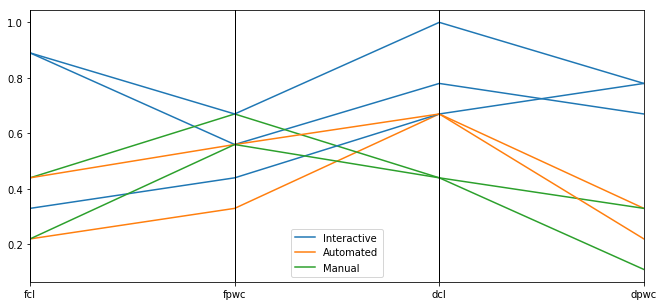

In [27]:
visualizer.parallelCoordinates(columns=['fcl','fpwc','dcl','dpwc'], 
                                figsize=(11,5),
                               legend=["Interactive","Automated","Manual"])

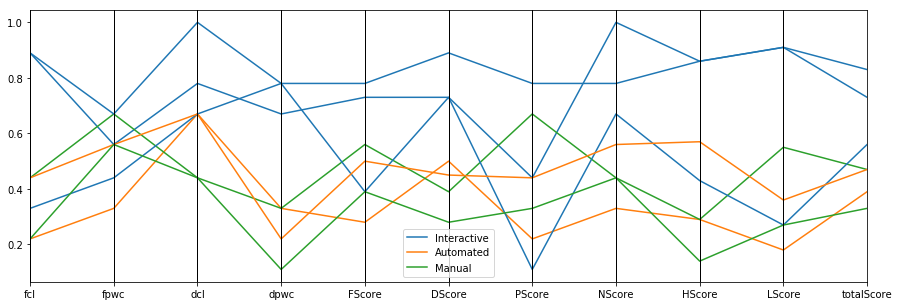

In [28]:
visualizer.parallelCoordinates(columns=['fcl','fpwc','dcl','dpwc','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
                                figsize=(15,5),
                               legend=["Interactive","Automated","Manual"])

In [29]:
PROP_CYCLE = plt.rcParams['axes.prop_cycle']
COLORS = PROP_CYCLE.by_key()['color']

In [30]:
df = resultAnalyzer.getDataFrame()

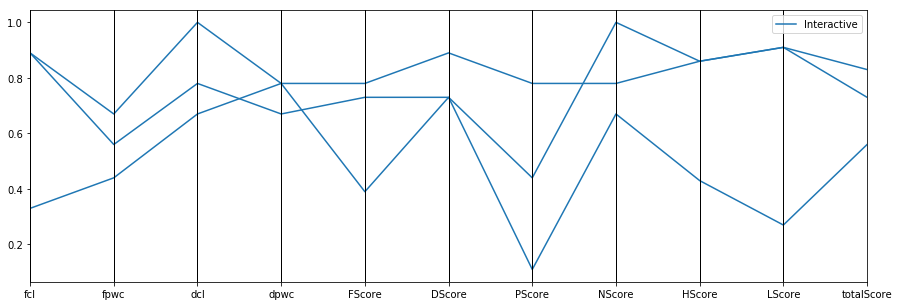

In [31]:
tempVis = visualization.Visualizer(groups=[g3], groupNames=['Interactive'])
tempDF = resultAnalyzer.getDataFrame().loc[df['condition'] == "interactive"]
tempVis.setDataFrame(tempDF)

tempVis.parallelCoordinates(columns=['fcl','fpwc','dcl','dpwc','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
                                figsize=(15,5),
                               legend=["Interactive"])

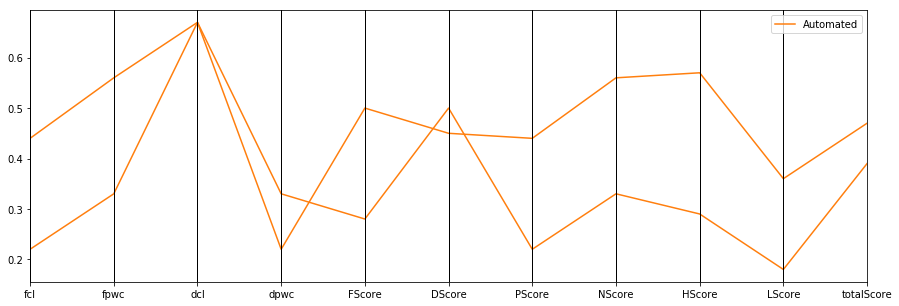

In [32]:

tempVis = visualization.Visualizer(groups=[g3], groupNames=['Automated'])

tempDF = resultAnalyzer.getDataFrame().loc[df['condition'] == "automated"]
tempVis.setDataFrame(tempDF)

tempVis.parallelCoordinates(columns=['fcl','fpwc','dcl','dpwc','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
                                figsize=(15,5),
                                colors=[COLORS[1]],
                               legend=["Automated"])



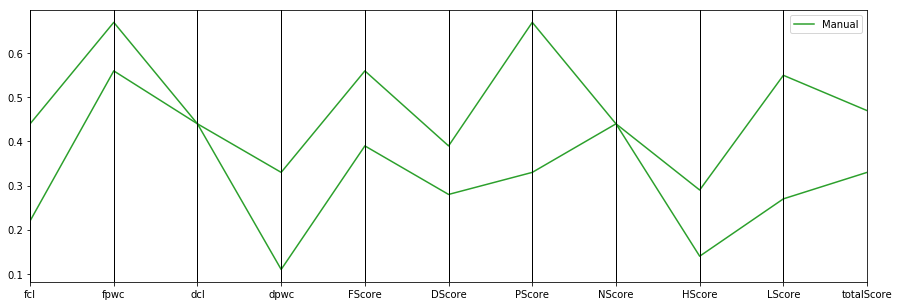

In [33]:
tempVis = visualization.Visualizer(groups=[g3], groupNames=['Manual'])

tempDF = resultAnalyzer.getDataFrame().loc[df['condition'] == "manual"]
tempVis.setDataFrame(tempDF)

tempVis.parallelCoordinates(columns=['fcl','fpwc','dcl','dpwc','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
                                figsize=(15,5),
                            colors=[COLORS[2]],
                               legend=["Manual"])


# Box plots

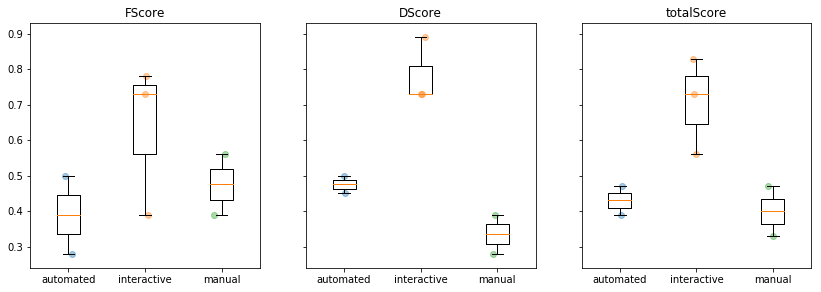

In [34]:
visualizer.boxPlot(columns=['FScore','DScore', 'totalScore'], nrows=1, ncols=3, sharey=True, figsize=(14,4.5))

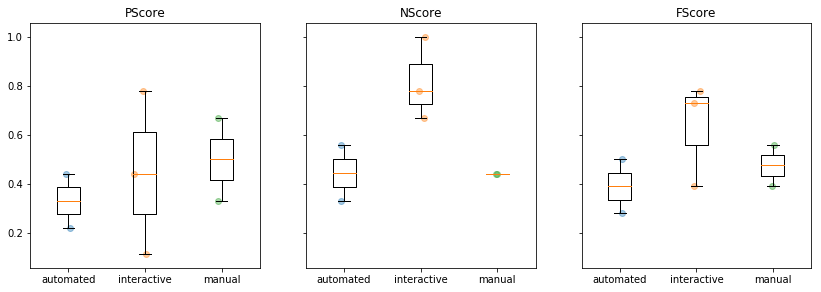

In [35]:
visualizer.boxPlot(columns=['PScore','NScore', 'FScore'], nrows=1, ncols=3, sharey=True, figsize=(14,4.5))

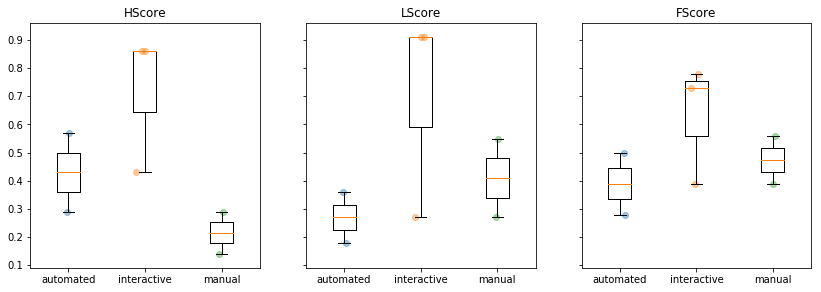

In [36]:
visualizer.boxPlot(columns=['HScore','LScore', 'FScore'], nrows=1, ncols=3, sharey=True, figsize=(14,4.5))

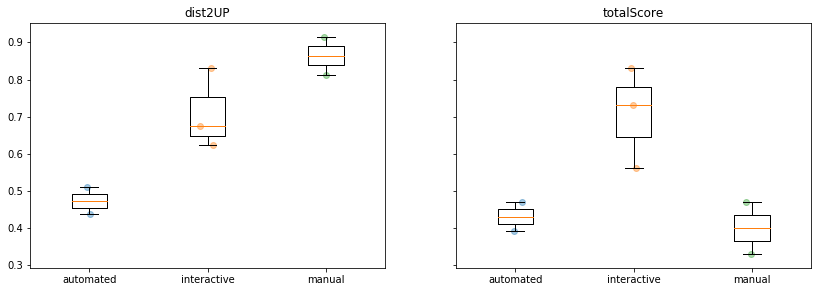

In [37]:
visualizer.boxPlot(columns=['dist2UP', 'totalScore'], nrows=1, ncols=2, sharey=True, figsize=(14,4.5))

# Statistical tests

In [38]:
df = resultAnalyzer.getDataFrame()

In [39]:
df

,id,condition,fcl,fpwc,dcl,dpwc,FScore,DScore,PScore,NScore,HScore,LScore,dist2UP,totalScore,selfAssessment
0,5401038285006004819-9_15_19_13,interactive,0.89,0.56,0.78,0.67,0.73,0.73,0.44,1.00,0.86,0.91,0.830796,0.73,2.50
1,3700789476005004819-9_16_15_58,automated,0.22,0.33,0.67,0.33,0.28,0.50,0.22,0.33,0.29,0.18,0.436284,0.39,1.50
2,3664515135004004819-9_20_14_13,manual,0.44,0.67,0.44,0.33,0.56,0.39,0.67,0.44,0.29,0.55,0.812639,0.47,2.50
3,3221520754006004819-10_2_6_8,interactive,0.33,0.44,0.67,0.78,0.39,0.73,0.11,0.67,0.43,0.27,0.623228,0.56,2.25
4,5577734270005004819-10_4_13_54,automated,0.44,0.56,0.67,0.22,0.50,0.45,0.44,0.56,0.57,0.36,0.509791,0.47,3.00
5,1708104476004004819-10_8_16_14,manual,0.22,0.56,0.44,0.11,0.39,0.28,0.33,0.44,0.14,0.27,0.915396,0.33,2.25
6,5772081801006004819-10_10_13_3,interactive,0.89,0.67,1.00,0.78,0.78,0.89,0.78,0.78,0.86,0.91,0.674159,0.83,3.25


In [40]:
df_interactive = df.loc[df['condition'] == "interactive"]
df_automated = df.loc[df['condition'] == "automated"]
df_manual = df.loc[df['condition'] == "manual"]

In [41]:
print(stats.ttest_ind(df_interactive['totalScore'], df_manual['totalScore']))
print(stats.ttest_ind(df_interactive['totalScore'], df_automated['totalScore']))

Ttest_indResult(statistic=2.6820143797423013, pvalue=0.07492051569852315)
Ttest_indResult(statistic=2.609512442862909, pvalue=0.07971848867244173)


In [42]:
print(stats.ttest_ind(df_interactive['DScore'], df_manual['DScore']))
print(stats.ttest_ind(df_interactive['DScore'], df_automated['DScore']))

Ttest_indResult(statistic=5.594865809996459, pvalue=0.01127926234620286)
Ttest_indResult(statistic=4.32263442068027, pvalue=0.0228189237556945)


In [43]:
print(stats.ttest_ind(df_interactive['NScore'], df_manual['NScore']))
print(stats.ttest_ind(df_interactive['NScore'], df_automated['NScore']))

Ttest_indResult(statistic=3.007546588450481, pvalue=0.05732346904976063)
Ttest_indResult(statistic=2.4489727104815637, pvalue=0.09176335554706658)


In [44]:
print(stats.ttest_ind(df_interactive['HScore'], df_manual['HScore']))
print(stats.ttest_ind(df_interactive['HScore'], df_automated['HScore']))

Ttest_indResult(statistic=2.595245502727552, pvalue=0.0807068761527923)
Ttest_indResult(statistic=1.3494174186354888, pvalue=0.270005021963656)


In [45]:
stats.f_oneway(df_interactive['totalScore'], df_automated['totalScore'], df_manual['totalScore'])

F_onewayResult(statistic=5.83819628647215, pvalue=0.06510700553422599)

In [46]:
stats.f_oneway(df_interactive['DScore'], df_automated['DScore'], df_manual['DScore'])

F_onewayResult(statistic=21.749071721711903, pvalue=0.007091967116313904)

In [47]:
stats.f_oneway(df_interactive['NScore'], df_automated['NScore'], df_manual['NScore'])

F_onewayResult(statistic=5.789576453697055, pvalue=0.06592229265305508)

In [48]:
stats.f_oneway(df_interactive['HScore'], df_automated['HScore'], df_manual['HScore'])

F_onewayResult(statistic=3.5986074752264923, pvalue=0.12761447906133022)

In [49]:
# from sklearn.linear_model import LinearRegression

# # X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array

# X = df[['condition','NScore']].values
# y = df['totalScore'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
# linear_regressor = LinearRegression()  # create object for the class
# linear_regressor.fit(X, y)  # perform linear regression


In [50]:
# linear_regressor.score(X, y)

In [51]:
# linear_regressor.coef_

In [52]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# data = sm.datasets.get_rdataset("dietox", "geepack").data
# md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
# mdf = md.fit()
# print(mdf.summary())

# Survey results

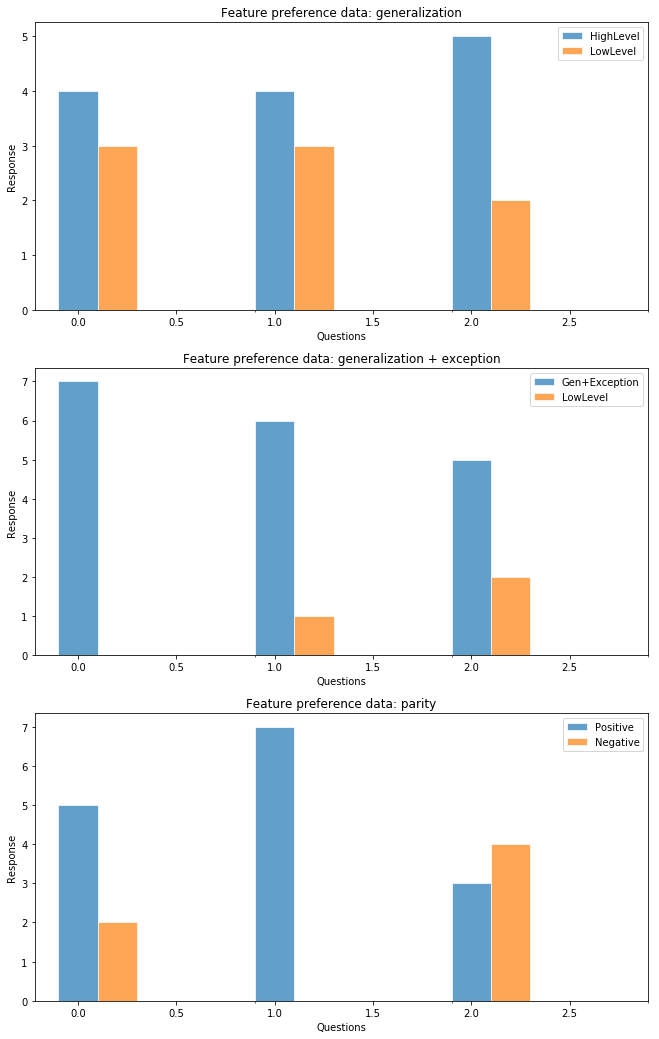

In [53]:
visualizer.featurePrefPlot(figsize=(11,18))

1
- Two radars should not be assigned to the same orbit
- Instruments {AERO_POL, CPR_RAD, SAR_ALTIM} are not assigned to the same orbit

2.
- Instruments that measure ocean color are not assigned to AM orbit
- AERO_LID, CPR_RAD are not assigned to SSO-600-DD orbit

3.
- Atmospheric chemistry instruments are assigned together in the same orbit
- HIRES_SOUND and HYP_IMAG are assigned together in the same orbit

4.
- SSO-800-DD is empty, except when it contains VEG_LID and/or SAR_ALTIM
- {OCE_SPEC, AERO_POL, AERO_LID, HYP_ERB, CPR_RAD, VEG_INSAR, CHEM_UVSPEC,CHEM_SWIRSPEC, HYP_IMAG, HIRES_SOUND} are not assigned to SSO-800-DD

5.
- VEG_INSAR is not used, except when it is assigned to LEO-600-polar
- HYP_ERB is not assigned to any of the orbits in the set {LEO-600-polar, SSO-600-AM, SSO-600-DD, SSO-800-DD}

6.
- Radars and lidars are not assigned to the same orbit, except when VEG_LID and VEG_INSAR are assigned together
- AERO_LID and CPR_RAD is not assigned together in the same orbit, and SAR_ALTIM and AERO_LID are not assigned together in the same orbit

7.
- AERO_POL and SAR_ALTIM are NOT assigned together in the same orbit
- CHEM_UVSPEC and HIRES_SOUND are assigned together in at least one of the orbits

8.
- OCE_SPEC is assigned to LEO-600-polar
- VEG_INSAR is NOT assigned to SSO-600-AM

9.
- AERO_LID is NOT used
- SAR_ALTIM is used

[[1.         1.5        0.33333333]
 [0.         0.5        0.33333333]
 [1.         0.5        0.33333333]
 [0.5        0.5        0.33333333]]


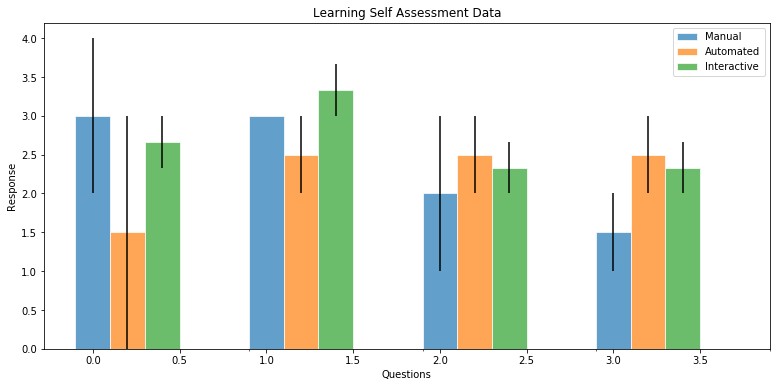

In [54]:
visualizer.selfAssessmentPlot(displayStderr=True)

1. I learned a lot about the given design problem from this exercise
2. The features I learned from this exercise will be useful to solve a different (but similar)
design problem in the future
3. The tool was useful in checking hypotheses I had based on my prior knowledge
4. The tool was useful in checking new hypotheses I had as I analyzed the data.

0=strongly disagree, 1=disagree, 2=undecided, 3=agree, 4=strongly agree

## Correlation between self learning assessment and problem set score

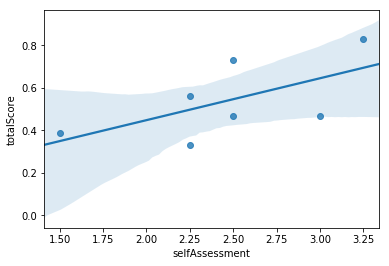

In [55]:
sns.regplot(x="selfAssessment", y="totalScore", data=df);

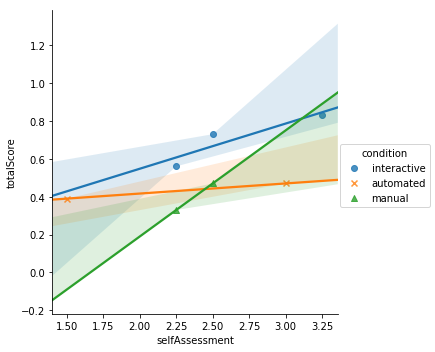

In [56]:
sns.lmplot(x="selfAssessment", y="totalScore", hue="condition", markers=["o","x","^"], data=df);

In [57]:
df = resultAnalyzer.getDataFrame()
mod = sm.OLS(np.array(df['selfAssessment']), np.array(df['totalScore']))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           5.30e-05
Time:                        13:24:47   Log-Likelihood:                -6.2476
No. Observations:                   7   AIC:                             14.50
Df Residuals:                       6   BIC:                             14.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.3316      0.426     10.157      0.0

/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [58]:
df_interactive = resultAnalyzer.getDataFrame().loc[df['condition'] == "interactive"]
mod = sm.OLS(np.array(df_interactive['selfAssessment']), np.array(df_interactive['totalScore']))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     447.1
Date:                Tue, 15 Oct 2019   Prob (F-statistic):            0.00223
Time:                        13:24:47   Log-Likelihood:                0.88429
No. Observations:                   3   AIC:                            0.2314
Df Residuals:                       2   BIC:                           -0.6700
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.7661      0.178     21.145      0.0

/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)


In [59]:
df_automated = resultAnalyzer.getDataFrame().loc[df['condition'] == "automated"]
mod = sm.OLS(np.array(df_automated['selfAssessment']), np.array(df_automated['totalScore']))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     18.41
Date:                Tue, 15 Oct 2019   Prob (F-statistic):              0.146
Time:                        13:24:47   Log-Likelihood:                -1.5995
No. Observations:                   2   AIC:                             5.199
Df Residuals:                       1   BIC:                             3.892
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.3485      1.247      4.290      0.1

/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  "samples were given." % int(n), ValueWarning)


In [60]:
df_manual = resultAnalyzer.getDataFrame().loc[df['condition'] == "manual"]
mod = sm.OLS(np.array(df_manual['selfAssessment']), np.array(df_manual['totalScore']))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     68.02
Date:                Tue, 15 Oct 2019   Prob (F-statistic):             0.0768
Time:                        13:24:47   Log-Likelihood:               -0.33627
No. Observations:                   2   AIC:                             2.673
Df Residuals:                       1   BIC:                             1.366
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.8141      0.705      8.247      0.0

/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  "samples were given." % int(n), ValueWarning)


## Correlation between problem set score and distance to the utopia point

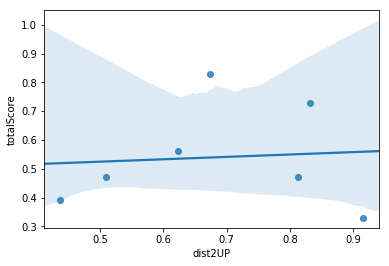

In [61]:
sns.regplot(x="dist2UP", y="totalScore", data=df);

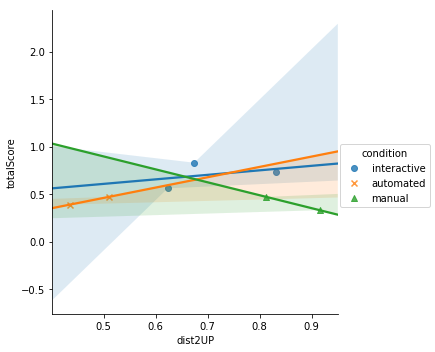

In [62]:
sns.lmplot(x="dist2UP", y="totalScore", hue="condition", markers=["o","x","^"], data=df);

In [63]:
df.columns

Index(['id', 'condition', 'fcl', 'fpwc', 'dcl', 'dpwc', 'FScore', 'DScore',
       'PScore', 'NScore', 'HScore', 'LScore', 'dist2UP', 'totalScore',
       'selfAssessment'],
      dtype='object')

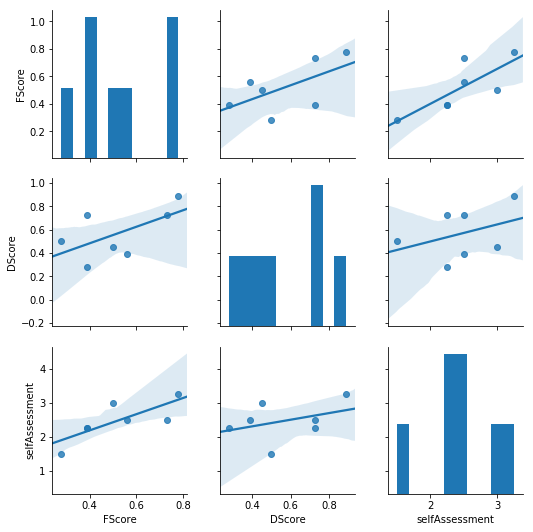

In [64]:
sns.pairplot(df[['condition','FScore','DScore','selfAssessment']], kind="reg")

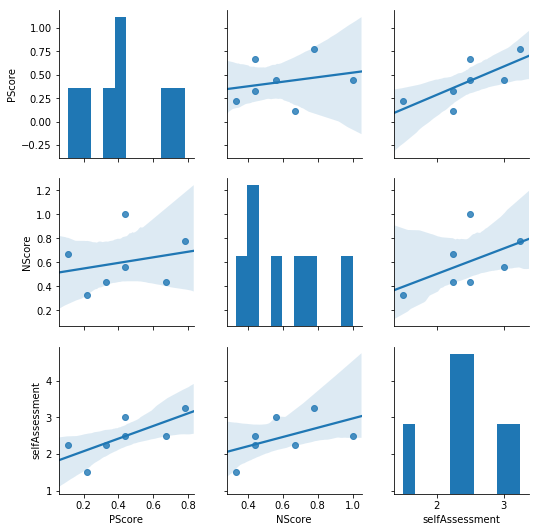

In [65]:
sns.pairplot(df[['condition','PScore','NScore','selfAssessment']], kind="reg")

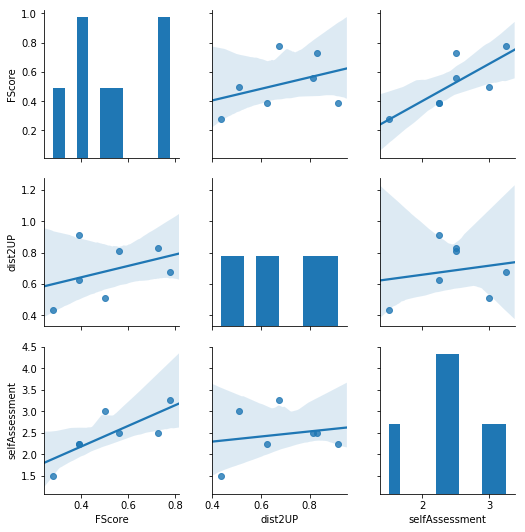

In [66]:
sns.pairplot(df[['condition','FScore','dist2UP','selfAssessment']], kind="reg")

In [67]:
die here

SyntaxError: invalid syntax (<ipython-input-67-c985d6ba8f59>, line 1)

In [ ]:
s0.learning_self_assessment_data

In [ ]:
s0.feature_preference_data

In [ ]:
s1.design_synthesis_task_data

In [ ]:
s2.feature_synthesis_task_data

In [ ]:
def plotBarGraph(mean1, stdev1, mean2, stdev2, mean3=None, stdev3=None):
    
    if mean3 is not None:
        N = 3
        means = (mean1, mean2, mean3)
        stdevs = (stdev1, stdev2, stdev3)
    
    else:
        N = 2
        means = (mean1, mean2)
        stdevs = (stdev1, stdev2)
        
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, means, width, color='skyblue', yerr=stdevs)

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Scores')
    ax.set_title('Scores')
    
    if mean3 is not None:
        ax.set_xticks(ind + width / 3)
        ax.set_xticklabels(('1', '2', '3'))
        
    else:
        ax.set_xticks(ind + width / 2)
        ax.set_xticklabels(('1', '2'))

    #ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))

    plt.show()

In [ ]:
def plotECDF(scores1,scores2):
    
    import statsmodels.api as sm # recommended import according to the docs

    sample = scores1
    ecdf = sm.distributions.ECDF(scores1)
    x = np.linspace(min(sample), max(sample))
    y = ecdf(x)
    plt.step(x, y)

    sample2 = scores2
    ecdf = sm.distributions.ECDF(sample2)
    x = np.linspace(min(sample2), max(sample2))
    y = ecdf(x)
    plt.step(x, y)

    plt.show()

In [ ]:
def writeToFile(data, header ,filePath = "/Users/bang/workspace/iFEED-experiment-201711-result/data/data.csv"):
    with open(filePath, 'w') as f:
        f.write(header + "\n")
        for row in data:
            f.write(",".join(row) + "\n")
    